<h1>Creating Audio</h1>

Let's think about a sound we want to create. Have you ever heard an orchestra or symphony tuning together at the start of a performance?

In [7]:
from IPython.display import HTML, Audio, display, clear_output
%matplotlib inline
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/KfSH1ezevjM?rel=0" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

The tone they're tuning to is "A 440". It's the note A, at 440 _Hertz_. We can generate a digital version of this tone from a computer with a few lines of code.

A tone is just a sine wave, following the formula

$$
wave = amplitude * \sin(2 * pi * f * t)
$$

For digital audio, we need a sampling rate, or how often to create digital samples. Let's set the sampling rate to 48,000 samples per second (also known as _Hertz_ or Hz), fast enough to capture all sounds in the range of human hearing. We could generate other very low or high pitches with this sampling rate.

This image shows an example of a digital audio signal. The red line is the original audio, and the blue dots are the digital representation.
![Digital Audio](img/4-bit-linear-PCM.svg)

The space between samples is only 1/48000 of a second! T is this _period_ of a single sample, or the time between successive samples.

Other parameters are the frequency (440 Hz to match the orchestra sound), amplitude, and duration.


In [2]:
rate_Hz = 48000
T = 1/rate_Hz
print ("One digital audio sample lasts just {:.10f} seconds!".format(T))
tone_frequency = 440
tone_amplitude = 0.5
duration_sec = 4

One digital audio sample lasts just 0.0000208333 seconds!


The last part we need is a timeline for the samples, t. It will be a list of numbers representing the clock time for each sample. It starts at time zero, the next number is $T$, then $2*T$, $3*T$, and so on.

To help us make this list, we import numpy, which is a Python library useful for manipulating numbers, vectors, and matrices in Python.

numpy makes this timeline for us automatically, if we give it the start value, the end value, and the number of steps to take inbetween.

In [3]:
import numpy as np
t = np.linspace(0, duration_sec, duration_sec*rate_Hz+1)
print("Our list of sample times: {}".format(t))

Our list of sample times: [0.00000000e+00 2.08333333e-05 4.16666667e-05 ... 3.99995833e+00
 3.99997917e+00 4.00000000e+00]


Finally let's make the actual wave. Recall our formula...

$$
wave = amplitude * \sin(2 * pi * f * t)
$$

numpy helps us again by providing the sine function and the constant Pi.

In [30]:
wave = 0.3 * np.sin( 2 * np.pi * tone_frequency * t)

Now let's check out the wave! Here's a function for listening to the audio, as well as looking at it in time and frequency.

In [33]:
def view_audio(audio, Fs, min_sample=0, max_sample=-1):
    display(Audio(audio.squeeze(), rate=rate_Hz))
    
    import matplotlib.pyplot as plt
    from matplotlib import rcParams
    rcParams.update({'font.size': 20})
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
    plot_audio = audio[min_sample:max_sample].squeeze()
    ax1.plot(plot_audio, '.', ms='2')
    ax1.set_title('Audio Samples')
    
    #ax2.specgram(plot_audio, Fs=Fs); ax2.set_title('Spectrogram'); ax2.set_yscale('log');ax2.set_ylim(1,20000)
    import matplotlib.mlab as mlab
    Pxx, freq, t = mlab.specgram(plot_audio, Fs=Fs, NFFT=1024)
    ax2.pcolor(t, freq, Pxx); ax2.set_yscale('log')
    ax2.set_ylim(10,22000)
    ax2.set_title('Spectrogram')
    

When you listen to the audio - does it sound similar to the orchestra clip? How is it different?

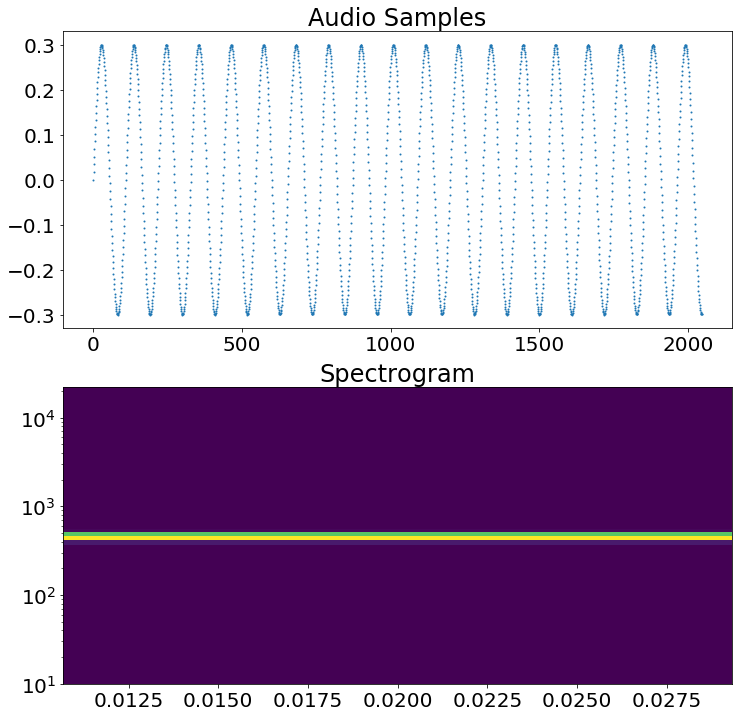

In [34]:
view_audio(wave, rate_Hz, min_sample=0, max_sample=2048)

<h1>Recording Audio</h1>

A sine tone is easy to make in code, but it's pretty boring to listen to. Natural sounds you hear every day are more complex. Let's take a look at sounds recorded from a microphone. There's a Python library for recording and playing audio too, it's called sounddevice. First we'll check out the devices available to the computer for recording audio.

In [9]:
import sounddevice as sd
print(sd.query_devices())

  0 Built-in Microphone, Core Audio (2 in, 0 out)
  1 Built-in Output, Core Audio (0 in, 2 out)
  2 HDMI, Core Audio (0 in, 2 out)
  3 eqMac, Core Audio (2 in, 2 out)
> 4 JBL Reflect Mini BT, Core Audio (1 in, 0 out)
< 5 JBL Reflect Mini BT, Core Audio (0 in, 2 out)


Now we'll run the recording, giving the function info about duration, sample rate, and device

In [10]:
recording_duration = 5  # seconds
my_recording = sd.rec(recording_duration*rate_Hz, samplerate=rate_Hz, device=0, channels=1)
sd.wait()

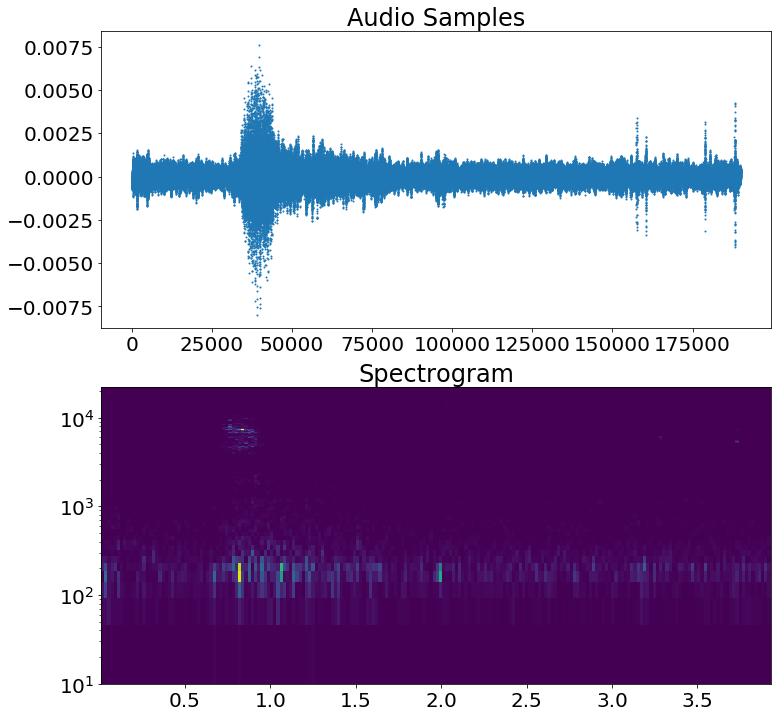

In [18]:
view_audio(my_recording, rate_Hz, min_sample=50000, max_sample=-1)